In [28]:
!pip install hazm

In [0]:
import numpy as np
import pandas as pd
from __future__ import unicode_literals
from hazm import *
import re
import matplotlib.pyplot as plt


In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
cd /content/gdrive/My\ Drive/faraji/digikala

/content/gdrive/My Drive/faraji/digikala


In [0]:
df_cln = pd.read_csv('balance_classified.csv')

#TF-IDF Vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [0]:
#Create the vectorizer
vectorizer = TfidfVectorizer()

In [0]:
X = df_cln['comment']
y = df_cln['class']

In [62]:
print(X.shape, y.shape)

(120716,) (120716,)


In [21]:
#Tokenize and build vocab
vectorizer.fit(X)

NameError: ignored

In [0]:
# Split train data into train and validation
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.25)

In [65]:
print(train_x.shape,valid_x.shape)

(90537,) (30179,)


In [0]:
# Use TF-IDF to Vectorize the train and validation data
xtrain_tfidf = vectorizer.transform(train_x)
xvalid_tfidf = vectorizer.transform(valid_x)

In [47]:
# See train vectorized data
xtrain_tfidf.data[:5]

array([0.27279948, 0.15781594, 0.07711881, 0.13880511, 0.34203442])

In [0]:
# See train vectorized data
xvalid_tfidf.data

array([0.36619077, 0.14406568, 0.19714958, ..., 0.54033258, 0.60784316,
       0.58186544])

In [0]:
# Word Dictionary
print(vectorizer.vocabulary_)

{'گیره': 51345, 'های': 40093, 'فلزی': 28901, 'خیلی': 17191, 'سخت': 23247, 'میشوند': 36053, 'لذا': 30609, 'حوله': 15546, 'می': 35254, 'توان': 13214, 'آورد': 886, 'مهسان': 34462, 'یه': 51784, 'مدل': 32678, 'دیگه': 20134, 'داره': 17411, 'پلاستیکی': 45452, 'هست': 40491, 'ساده': 22732, 'راحت': 20288, 'خم': 16381, 'نظرم': 38114, 'تولید': 13470, 'طرح': 26741, 'متوقف': 32019, 'کنن': 49492, 'چون': 47042, 'آهنی': 868, 'سفت': 23760, 'هستن': 40521, 'وقتی': 43245, 'خواستم': 16473, 'خمشون': 16385, 'کنم': 49484, 'پایه': 44627, 'پلاستیکیش': 45454, 'شکست': 25781, 'بلا': 9773, 'استفاده': 2738, 'متاسفانه': 31807, 'عمر': 27697, 'مفید': 33840, 'ماشین': 31337, 'کم': 49159, 'بعد': 9566, 'سال': 22859, 'باطری': 7102, 'کار': 47409, 'نمیکنه': 38891, 'گیر': 51299, 'میکنه': 36546, 'نحوی': 37327, 'هیچیک': 41372, 'دکمه': 19778, 'ها': 39920, 'چند': 46801, 'ساعت': 22820, 'حالت': 14989, 'میمونه': 36207, 'دوباره': 19211, 'اتصال': 1364, 'برق': 8749, 'خوب': 16575, 'بودممنون': 10462, 'نزدیک': 37736, 'ساله': 22898, 'هارد': 

##Apply Naive Bayes

In [0]:
# Naive Bayes trainig
from sklearn.naive_bayes import MultinomialNB

# accuracy = train_model(MultinomialNB(alpha=0.2), xtrain_tfidf, train_y, xvalid_tfidf)
# print ("Accuracy: ", accuracy)
# pred=

In [68]:
from sklearn.metrics import accuracy_score

# def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
  # fit the training dataset on the classifier
classifier=MultinomialNB(alpha=0.2)
classifier.fit(xtrain_tfidf, train_y)
  # predict the labels on validation dataset
pred = classifier.predict(xvalid_tfidf)
print(accuracy_score(pred,valid_y))
#   return accuracy_score(pred, valid_y)

0.5253984558799165


In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
#     ax.set(xticks=np.arange(cm.shape[1]),
#            yticks=np.arange(cm.shape[0]),
#            # ... and label them with the respective list entries
#            xticklabels=classes, yticklabels=classes,
#            title=title,
#            ylabel='True label',
#            xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

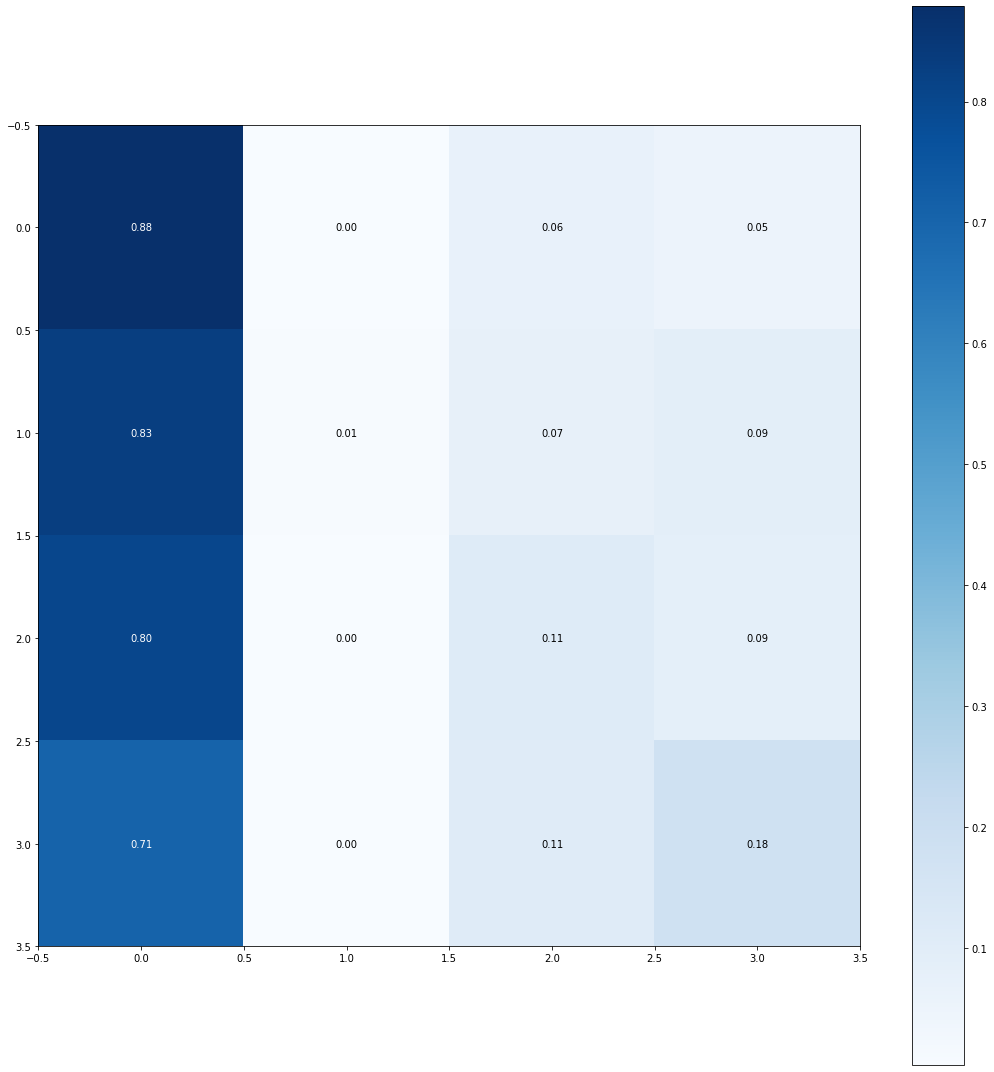

In [51]:
plot_confusion_matrix(valid_y, pred,title='Confusion matrix', normalize=True)
plt.savefig('Confusiom matrix.png')

In [0]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Embedding, Flatten
from keras import *
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

from keras.layers import *


In [0]:
# train_x, valid_x, train_y, valid_y = train_test_split(..., test_size=0.3)
num_features=5
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = num_features)
# tokenizer.fit_on_texts(train_x)
train_sequences = tokenizer.texts_to_sequences(X)
valid_sequences = tokenizer.texts_to_sequences(valid_x)

# get only the top frequent words on train
train_data = pad_sequences(train_sequences, padding = "post", maxlen =120)
# get only the top frequent words on test
valid_data = pad_sequences(valid_sequences, padding = "post", maxlen = 30)

In [0]:
y =tf.keras.utils. to_categorical(y)

In [0]:
filter_sizes = [3, 4, 8]
def convolution():
    inn = Input(shape = (120, 120, 1))
    convolutions = []
    # we conduct three convolutions & poolings then concatenate them.
    for fs in filter_sizes:
        conv = Conv2D(filters = 150, kernel_size = (fs, 120), strides = 1, padding = "valid")(inn)
        nonlinearity = Activation('relu')(conv)
        maxpool = MaxPooling2D(pool_size = (120- fs + 1, 1), padding = "valid")(nonlinearity)
        convolutions.append(maxpool)
        
    outt = concatenate(convolutions)
    model = Model(inputs = inn, outputs = outt)
        
    return model

In [37]:
y.shape , train_data.shape

((120716, 4), (120716, 120))

In [0]:
model = Sequential()
model.add(Embedding(input_dim =120716, output_dim = 120, input_length = 120))
model.add(Reshape((120, 120, 1), input_shape = (120,120 )))
model.add(Dropout(0.5))
    # call convolution method defined above
model.add(convolution())
    
model.add(Flatten())
model.add(Dense(500, activation = 'relu', kernel_initializer='he_normal'
,kernel_regularizer=regularizers.l1(0.01),bias_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'
,kernel_regularizer=regularizers.l1(0.01),bias_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('sigmoid'))

adam = optimizers.Adam(lr = 0.001)


model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])
       

In [0]:
history = model.fit(train_data, y,
                    batch_size = 50,
                    validation_split = .7,
                    epochs = 5, verbose = 1
                    )

Train on 36214 samples, validate on 84502 samples
Epoch 1/5
36214/36214 [==============================] - 452s 12ms/step - loss: 8.8165 - acc: 0.8928 - val_loss: 1.8643 - val_acc: 0.5000
Epoch 2/5
13300/36214 [==========>...................] - ETA: 3:36 - loss: 0.5298 - acc: 0.9238

In [0]:
%load_ext tensorboard

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras


In [0]:
!rm -rf ./logs/ 

In [0]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


In [35]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 977), started 0:54:44 ago. (Use '!kill 977' to kill it.)

In [36]:
!kill 977'

/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


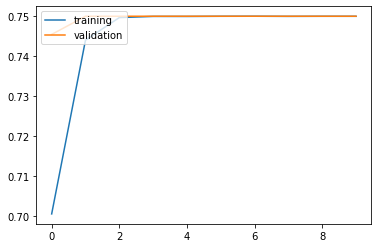

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()